In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

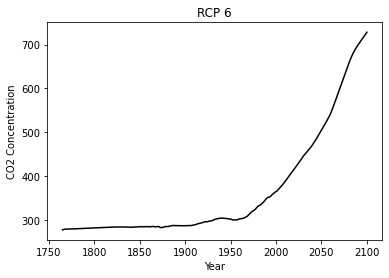

In [23]:
RCP6_concentration = pd.read_csv('RCP6_concentration.DAT', header=33, sep='\s+')
RCP6_concentration = RCP6_concentration[['YEARS', 'CO2EQ']].iloc[:336,:]

plt.plot(RCP6_concentration.iloc[:,0], RCP6_concentration.iloc[:,1], c='k')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration')
plt.title('RCP 6')
plt.show()


In [21]:
RCP6_concentration = pd.read_csv('RCP6_concentration.DAT', header=33, sep='\s+')
RCP6_concentration

,YEARS,CO2EQ,KYOTO-CO2EQ,CO2,CH4,N2O,FGASSUMHFC134AEQ,MHALOSUMCFC12EQ,CF4,C2F6,...,MCF,HCFC_22,HCFC_141B,HCFC_142B,HALON1211,HALON1202,HALON1301,HALON2402,CH3BR,CH3CL
0,1765,277.01467,277.01467,278.05158,721.89411,272.95961,0.00000,0.00000,35.00000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.800000,480.00000
1,1766,277.83880,277.81457,278.10615,722.25570,272.97121,0.00000,0.00000,35.00000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.800000,480.00000
2,1767,278.69351,278.68732,278.22039,722.97082,272.99419,0.00000,0.00000,35.00000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.800000,480.00000
3,1768,278.74752,278.83598,278.34305,723.66792,273.01678,0.00000,0.00000,35.00000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.800000,480.00000
4,1769,278.79644,278.98880,278.47058,724.34313,273.03903,0.00000,0.00000,35.00000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.800000,480.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2496,808.70955,899.56969,751.99877,1510.75890,426.96211,605.77786,119.57726,257.34065,15.641697,...,7.350571e-12,0.062905,0.141005,0.049579,0.001633,1.302562e-23,0.301018,0.000152,5.690012,538.02891
732,2497,808.70955,899.56969,751.99877,1510.75890,426.96211,605.77786,119.57726,257.34065,15.641697,...,7.350571e-12,0.062905,0.141005,0.049579,0.001633,1.302562e-23,0.301018,0.000152,5.690012,538.02891
733,2498,808.70955,899.56969,751.99877,1510.75890,426.96211,605.77786,119.57726,257.34065,15.641697,...,7.350571e-12,0.062905,0.141005,0.049579,0.001633,1.302562e-23,0.301018,0.000152,5.690012,538.02891
734,2499,808.70955,899.56969,751.99877,1510.75890,426.96211,605.77786,119.57726,257.34065,15.641697,...,7.350571e-12,0.062905,0.141005,0.049579,0.001633,1.302562e-23,0.301018,0.000152,5.690012,538.02891


In [36]:
historical_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
historical_data

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015,12.170,1.653,0.198,13.308,1.138,9.350,0.881,...,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016,10.815,-11.139,-1.356,12.171,1.356,12.542,0.771,...,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017,10.247,-5.251,-0.568,11.774,1.527,14.902,0.720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018,11.341,10.674,1.094,12.815,1.475,13.006,0.785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN


In [130]:
RCP6_emissions = pd.read_excel('rcp_db.xls')
RCP6_emissions = RCP6_emissions.iloc[0:1,4:-1]
RCP6_emissions = RCP6_emissions.stack()
# RCP6_emissions is now a Series
years = list(RCP6_emissions.index.values)
years = [value[1] for value in years]
RCP6_emissions = pd.DataFrame(data={'Year': years, 'CO2': list(RCP6_emissions)})
RCP6_emissions

# np.savetxt(r'c:\data\RCP6_emissions.txt', RCP6_emissions.values, fmt='%.4e')


,Year,CO2
0,2000,7.8838
1,2005,9.1665
2,2010,9.3889
3,2020,9.3567
4,2030,9.4379
5,2040,10.8403
6,2050,12.5800
7,2060,14.5660
8,2070,16.4767
9,2080,17.5247


In [48]:
# Run this cell
# Data
ssp = pd.read_csv('https://raw.githubusercontent.com/csun365/EPS-03/main/SSP_IAM_V2_201811.csv')

# years_list will be used as the X-ticks for all SSP scenarios
years_list = np.array([2005])
years_list = np.append(years_list, [np.arange(2010, 2110, 10)])

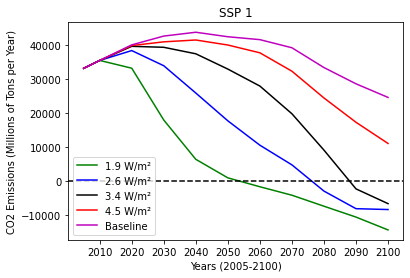

In [50]:
ssp1 = ssp[(ssp['VARIABLE']=='Emissions|CO2') & (ssp['REGION']=='World') & (ssp['MODEL']=='IMAGE')]
ssp1 = ssp1.reset_index(drop=True).iloc[:5,:]

ssp1_19 = [value for value in ssp1.loc[0,'2005':]]
ssp1_26 = [value for value in ssp1.loc[1,'2005':]]
ssp1_34 = [value for value in ssp1.loc[2,'2005':]]
ssp1_45 = [value for value in ssp1.loc[3,'2005':]]
ssp1_baseline = [value for value in ssp1.loc[4,'2005':]]

plt.plot(years_list, ssp1_19, c='g')
plt.plot(years_list, ssp1_26, c='b')
plt.plot(years_list, ssp1_34, c='k')
plt.plot(years_list, ssp1_45, c='r')
plt.plot(years_list, ssp1_baseline, c='m')
plt.title('SSP 1')
plt.xlabel('Years (2005-2100)')
plt.ylabel('CO2 Emissions (Millions of Tons per Year)')
plt.xticks(ticks=[i for i in years_list[1:]])
plt.axhline(y=0, c='k', linestyle='--')
plt.legend(['1.9 W/m\u00b2', '2.6 W/m\u00b2', '3.4 W/m\u00b2', '4.5 W/m\u00b2', 'Baseline'])
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   (10,10)
plt.show()


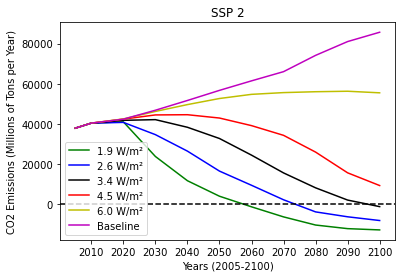

In [6]:
ssp2 = ssp[(ssp['VARIABLE']=='Emissions|CO2') & (ssp['REGION']=='World') & (ssp['MODEL']=='MESSAGE-GLOBIOM')]
ssp2 = ssp2.iloc[5:11,:].reset_index()

ssp2_19 = [value for value in ssp2.loc[0,'2005':]]
ssp2_26 = [value for value in ssp2.loc[1,'2005':]]
ssp2_34 = [value for value in ssp2.loc[2,'2005':]]
ssp2_45 = [value for value in ssp2.loc[3,'2005':]]
ssp2_60 = [value for value in ssp2.loc[4,'2005':]]
ssp2_baseline = [value for value in ssp2.loc[5,'2005':]]

plt.plot(years_list, ssp2_19, c='g')
plt.plot(years_list, ssp2_26, c='b')
plt.plot(years_list, ssp2_34, c='k')
plt.plot(years_list, ssp2_45, c='r')
plt.plot(years_list, ssp2_60, c='y')
plt.plot(years_list, ssp2_baseline, c='m')
plt.title('SSP 2')
plt.xlabel('Years (2005-2100)')
plt.ylabel('CO2 Emissions (Millions of Tons per Year)')
plt.xticks(ticks=[i for i in years_list[1:]])
plt.axhline(y=0, c='k', linestyle='--')
plt.legend(['1.9 W/m\u00b2', '2.6 W/m\u00b2', '3.4 W/m\u00b2', '4.5 W/m\u00b2', '6.0 W/m\u00b2', 'Baseline'])
plt.show()


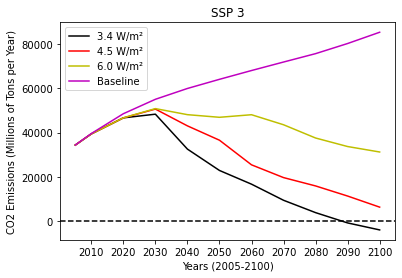

In [7]:
ssp3 = ssp[(ssp['VARIABLE']=='Emissions|CO2') & (ssp['REGION']=='World') & (ssp['MODEL']=='AIM/CGE')]
ssp3 = ssp3.iloc[11:15,:].reset_index()

ssp3_34 = [value for value in ssp3.loc[0,'2005':]]
ssp3_45 = [value for value in ssp3.loc[1,'2005':]]
ssp3_60 = [value for value in ssp3.loc[2,'2005':]]
ssp3_baseline = [value for value in ssp3.loc[3,'2005':]]

plt.plot(years_list, ssp3_34, c='k')
plt.plot(years_list, ssp3_45, c='r')
plt.plot(years_list, ssp3_60, c='y')
plt.plot(years_list, ssp3_baseline, c='m')
plt.title('SSP 3')
plt.xlabel('Years (2005-2100)')
plt.ylabel('CO2 Emissions (Millions of Tons per Year)')
plt.xticks(ticks=[i for i in years_list[1:]])
plt.axhline(y=0, c='k', linestyle='--')
plt.legend(['3.4 W/m\u00b2', '4.5 W/m\u00b2', '6.0 W/m\u00b2', 'Baseline'])
plt.show()


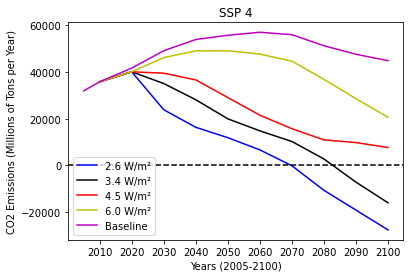

In [9]:
ssp4 = ssp[(ssp['VARIABLE']=='Emissions|CO2') & (ssp['REGION']=='World') & (ssp['MODEL']=='GCAM4')]
ssp4 = ssp4.iloc[12:17,:].reset_index()

ssp4_26 = [value for value in ssp4.loc[0,'2010':]]
ssp4_34 = [value for value in ssp4.loc[1,'2010':]]
ssp4_45 = [value for value in ssp4.loc[2,'2010':]]
ssp4_60 = [value for value in ssp4.loc[3,'2010':]]
ssp4_baseline = [value for value in ssp4.loc[4,'2005':]]

years_list_modified = years_list[1:]

plt.plot(years_list_modified, ssp4_26, c='b')
plt.plot(years_list_modified, ssp4_34, c='k')
plt.plot(years_list_modified, ssp4_45, c='r')
plt.plot(years_list_modified, ssp4_60, c='y')
plt.plot(years_list, ssp4_baseline, c='m')
plt.title('SSP 4')
plt.xlabel('Years (2005-2100)')
plt.ylabel('CO2 Emissions (Millions of Tons per Year)')
plt.xticks(ticks=[i for i in years_list[1:]])
plt.axhline(y=0, c='k', linestyle='--')
plt.legend(['2.6 W/m\u00b2', '3.4 W/m\u00b2', '4.5 W/m\u00b2', '6.0 W/m\u00b2', 'Baseline'])
plt.show()


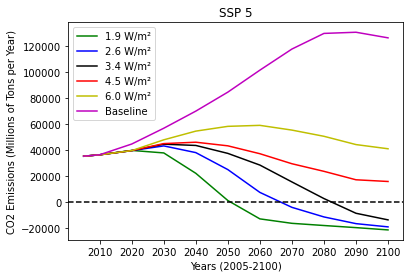

In [10]:
ssp5 = ssp[(ssp['VARIABLE']=='Emissions|CO2') & (ssp['REGION']=='World') & (ssp['MODEL']=='REMIND-MAGPIE')]
ssp5 = ssp5.iloc[11:17,:].reset_index()

ssp5_19 = [value for value in ssp5.loc[0,'2005':]]
ssp5_26 = [value for value in ssp5.loc[1,'2005':]]
ssp5_34 = [value for value in ssp5.loc[2,'2005':]]
ssp5_45 = [value for value in ssp5.loc[3,'2005':]]
ssp5_60 = [value for value in ssp5.loc[4,'2005':]]
ssp5_baseline = [value for value in ssp5.loc[5,'2005':]]

plt.plot(years_list, ssp5_19, c='g')
plt.plot(years_list, ssp5_26, c='b')
plt.plot(years_list, ssp5_34, c='k')
plt.plot(years_list, ssp5_45, c='r')
plt.plot(years_list, ssp5_60, c='y')
plt.plot(years_list, ssp5_baseline, c='m')
plt.title('SSP 5')
plt.xlabel('Years (2005-2100)')
plt.ylabel('CO2 Emissions (Millions of Tons per Year)')
plt.xticks(ticks=[i for i in years_list[1:]])
plt.axhline(y=0, c='k', linestyle='--')
plt.legend(['1.9 W/m\u00b2', '2.6 W/m\u00b2', '3.4 W/m\u00b2', '4.5 W/m\u00b2', '6.0 W/m\u00b2', 'Baseline'])
plt.show()


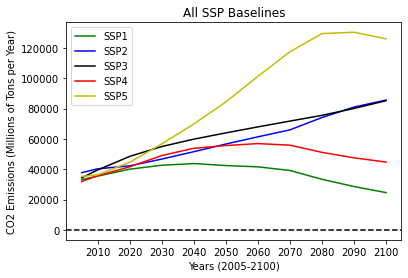

In [11]:
# ALL SSP Baselines
ssp1_baseline = [value for value in ssp1.loc[4,'2005':]]
ssp2_baseline = [value for value in ssp2.loc[5,'2005':]]
ssp3_baseline = [value for value in ssp3.loc[3,'2005':]]
ssp4_baseline = [value for value in ssp4.loc[4,'2005':]]
ssp5_baseline = [value for value in ssp5.loc[5,'2005':]]

plt.plot(years_list, ssp1_baseline, c='g')
plt.plot(years_list, ssp2_baseline, c='b')
plt.plot(years_list, ssp3_baseline, c='k')
plt.plot(years_list, ssp4_baseline, c='r')
plt.plot(years_list, ssp5_baseline, c='y')
plt.title('All SSP Baselines')
plt.xlabel('Years (2005-2100)')
plt.ylabel('CO2 Emissions (Millions of Tons per Year)')
plt.xticks(ticks=[i for i in years_list[1:]])
plt.axhline(y=0, c='k', linestyle='--')
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
plt.show()


In [27]:
# Titles of the models 
models = []
for model in ssp['MODEL']:
    if not model in models:
        models.append(model)
models

['AIM/CGE',
 'GCAM4',
 'IMAGE',
 'MESSAGE-GLOBIOM',
 'REMIND-MAGPIE',
 'WITCH-GLOBIOM']

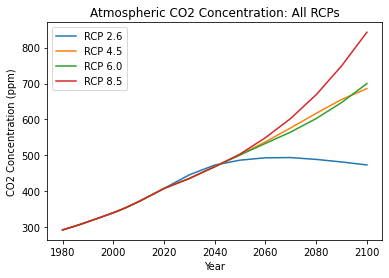

In [47]:
# Plotting Atmospheric CO2 in ppm from all the RCP scenarios 
RCP26 = pd.read_csv('RCP26.txt', sep='\s+', header=None)
RCP26 = RCP26[[0,2]].set_axis(['Year', 'Atmospheric CO2'], axis=1)

RCP45 = pd.read_csv('RCP45.txt', sep='\s+', header=None)
RCP45 = RCP45[[0,2]].set_axis(['Year', 'Atmospheric CO2'], axis=1)

RCP60 = pd.read_csv('RCP6.txt', sep='\s+', header=None)
RCP60 = RCP60[[0,2]].set_axis(['Year', 'Atmospheric CO2'], axis=1)

RCP85 = pd.read_csv('RCP85.txt', sep='\s+', header=None)
RCP85 = RCP85[[0,2]].set_axis(['Year', 'Atmospheric CO2'], axis=1)

plt.plot(-1*RCP26.iloc[:,0], RCP26.iloc[:,1])
plt.plot(-1*RCP45.iloc[:,0], RCP45.iloc[:,1])
plt.plot(-1*RCP60.iloc[:,0], RCP60.iloc[:,1])
plt.plot(-1*RCP85.iloc[:,0], RCP85.iloc[:,1])
plt.title('Atmospheric CO2 Concentration: All RCPs')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend(['RCP 2.6', 'RCP 4.5', 'RCP 6.0', 'RCP 8.5'])
plt.show()


In [118]:
d = np.transpose(np.array([np.arange(1980, 2101, 1), np.linspace(3e14, 3e15, np.arange(1980, 2101, 1).size)]))
alk_scenario = pd.DataFrame(data=d, columns=['Year', 'Added Alkalinity (mol/year)'])

# np.savetxt('alk_scenario.txt', alk_scenario.values, fmt='%.4e')
